In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

%matplotlib inline

In [ ]:
df = pd.read_csv('phishing-website-dataset.csv')

# Data Overview

In [ ]:
# First 5 sample rows of Dataset
df.head()

,Unnamed: 0,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,0,1,-1,1,1,1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,2,1,1,1,1,1,-1,0,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,2,3,1,0,1,1,1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,3,4,1,0,1,1,1,-1,-1,-1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,4,5,1,0,-1,1,1,-1,1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [ ]:
# Name of columns
list(df.columns)

['Unnamed: 0',
 'index',
 'having_IPhaving_IP_Address',
 'URLURL_Length',
 'Shortining_Service',
 'having_At_Symbol',
 'double_slash_redirecting',
 'Prefix_Suffix',
 'having_Sub_Domain',
 'SSLfinal_State',
 'Domain_registeration_length',
 'Favicon',
 'port',
 'HTTPS_token',
 'Request_URL',
 'URL_of_Anchor',
 'Links_in_tags',
 'SFH',
 'Submitting_to_email',
 'Abnormal_URL',
 'Redirect',
 'on_mouseover',
 'RightClick',
 'popUpWidnow',
 'Iframe',
 'age_of_domain',
 'DNSRecord',
 'web_traffic',
 'Page_Rank',
 'Google_Index',
 'Links_pointing_to_page',
 'Statistical_report',
 'Result']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Unnamed: 0                   11055 non-null  int64
 1   index                        11055 non-null  int64
 2   having_IPhaving_IP_Address   11055 non-null  int64
 3   URLURL_Length                11055 non-null  int64
 4   Shortining_Service           11055 non-null  int64
 5   having_At_Symbol             11055 non-null  int64
 6   double_slash_redirecting     11055 non-null  int64
 7   Prefix_Suffix                11055 non-null  int64
 8   having_Sub_Domain            11055 non-null  int64
 9   SSLfinal_State               11055 non-null  int64
 10  Domain_registeration_length  11055 non-null  int64
 11  Favicon                      11055 non-null  int64
 12  port                         11055 non-null  int64
 13  HTTPS_token                  11055 non-null  i

You can see that there are no missing values in the Dataset

In [ ]:
for col in df.columns:
    unique_value_list = df[col].unique()
    if len(unique_value_list) > 10:
        print(f'{col} has {df[col].nunique()} unique values')
    else:
        print(f'{col} contains:\t\t\t{unique_value_list}')

Unnamed: 0 has 11055 unique values
index has 11055 unique values
having_IPhaving_IP_Address contains:			[-1  1]
URLURL_Length contains:			[ 1  0 -1]
Shortining_Service contains:			[ 1 -1]
having_At_Symbol contains:			[ 1 -1]
double_slash_redirecting contains:			[-1  1]
Prefix_Suffix contains:			[-1  1]
having_Sub_Domain contains:			[-1  0  1]
SSLfinal_State contains:			[-1  1  0]
Domain_registeration_length contains:			[-1  1]
Favicon contains:			[ 1 -1]
port contains:			[ 1 -1]
HTTPS_token contains:			[-1  1]
Request_URL contains:			[ 1 -1]
URL_of_Anchor contains:			[-1  0  1]
Links_in_tags contains:			[ 1 -1  0]
SFH contains:			[-1  1  0]
Submitting_to_email contains:			[-1  1]
Abnormal_URL contains:			[-1  1]
Redirect contains:			[0 1]
on_mouseover contains:			[ 1 -1]
RightClick contains:			[ 1 -1]
popUpWidnow contains:			[ 1 -1]
Iframe contains:			[ 1 -1]
age_of_domain contains:			[-1  1]
DNSRecord contains:			[-1  1]
web_traffic contains:			[-1  0  1]
Page_Rank contains:			[-1  1]

According to the Data descrition, these are the meaning of the values in the data
* 1 means legitimate
* 0 is suspicious
* -1 is phishing

Let us drop the index column because that acts as a primary key and has no significance in EDA and modelling

In [ ]:
df = df.drop(columns=['index'])

The data seems pretty much balanced i.e. There is not a significant difference between the count of the target variable values.

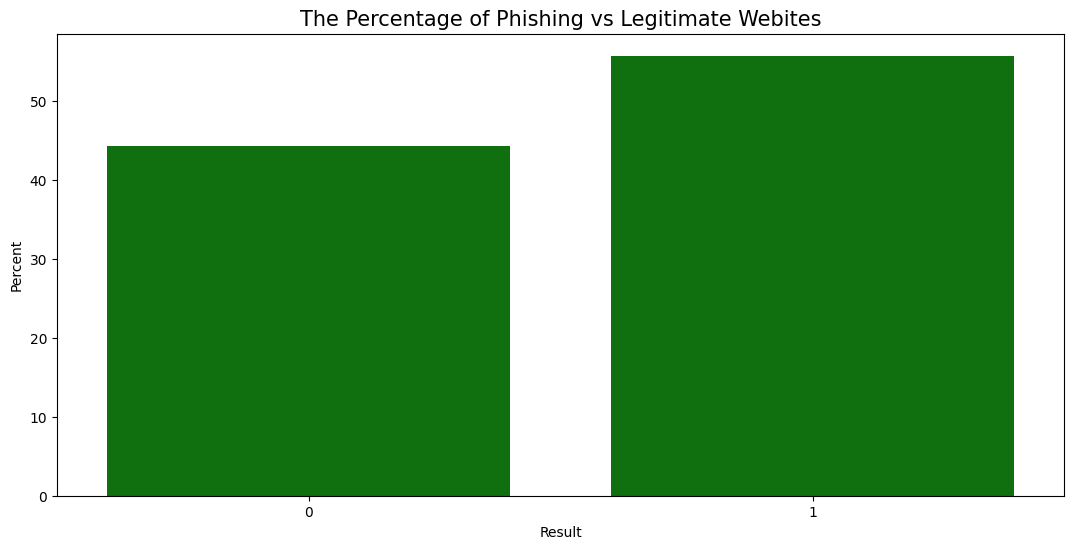

In [ ]:
plt.figure(figsize=(13, 6))
ax = sns.barplot(x="Result", y="Result", data=df, estimator=lambda x: len(x) / len(df) * 100, color = 'Green')
ax.set(ylabel="Percent");
ax.set_title('The Percentage of Phishing vs Legitimate Webites', size = 15);
plt.savefig('resultpercentageplot.png', dpi=300, bbox_inches='tight');

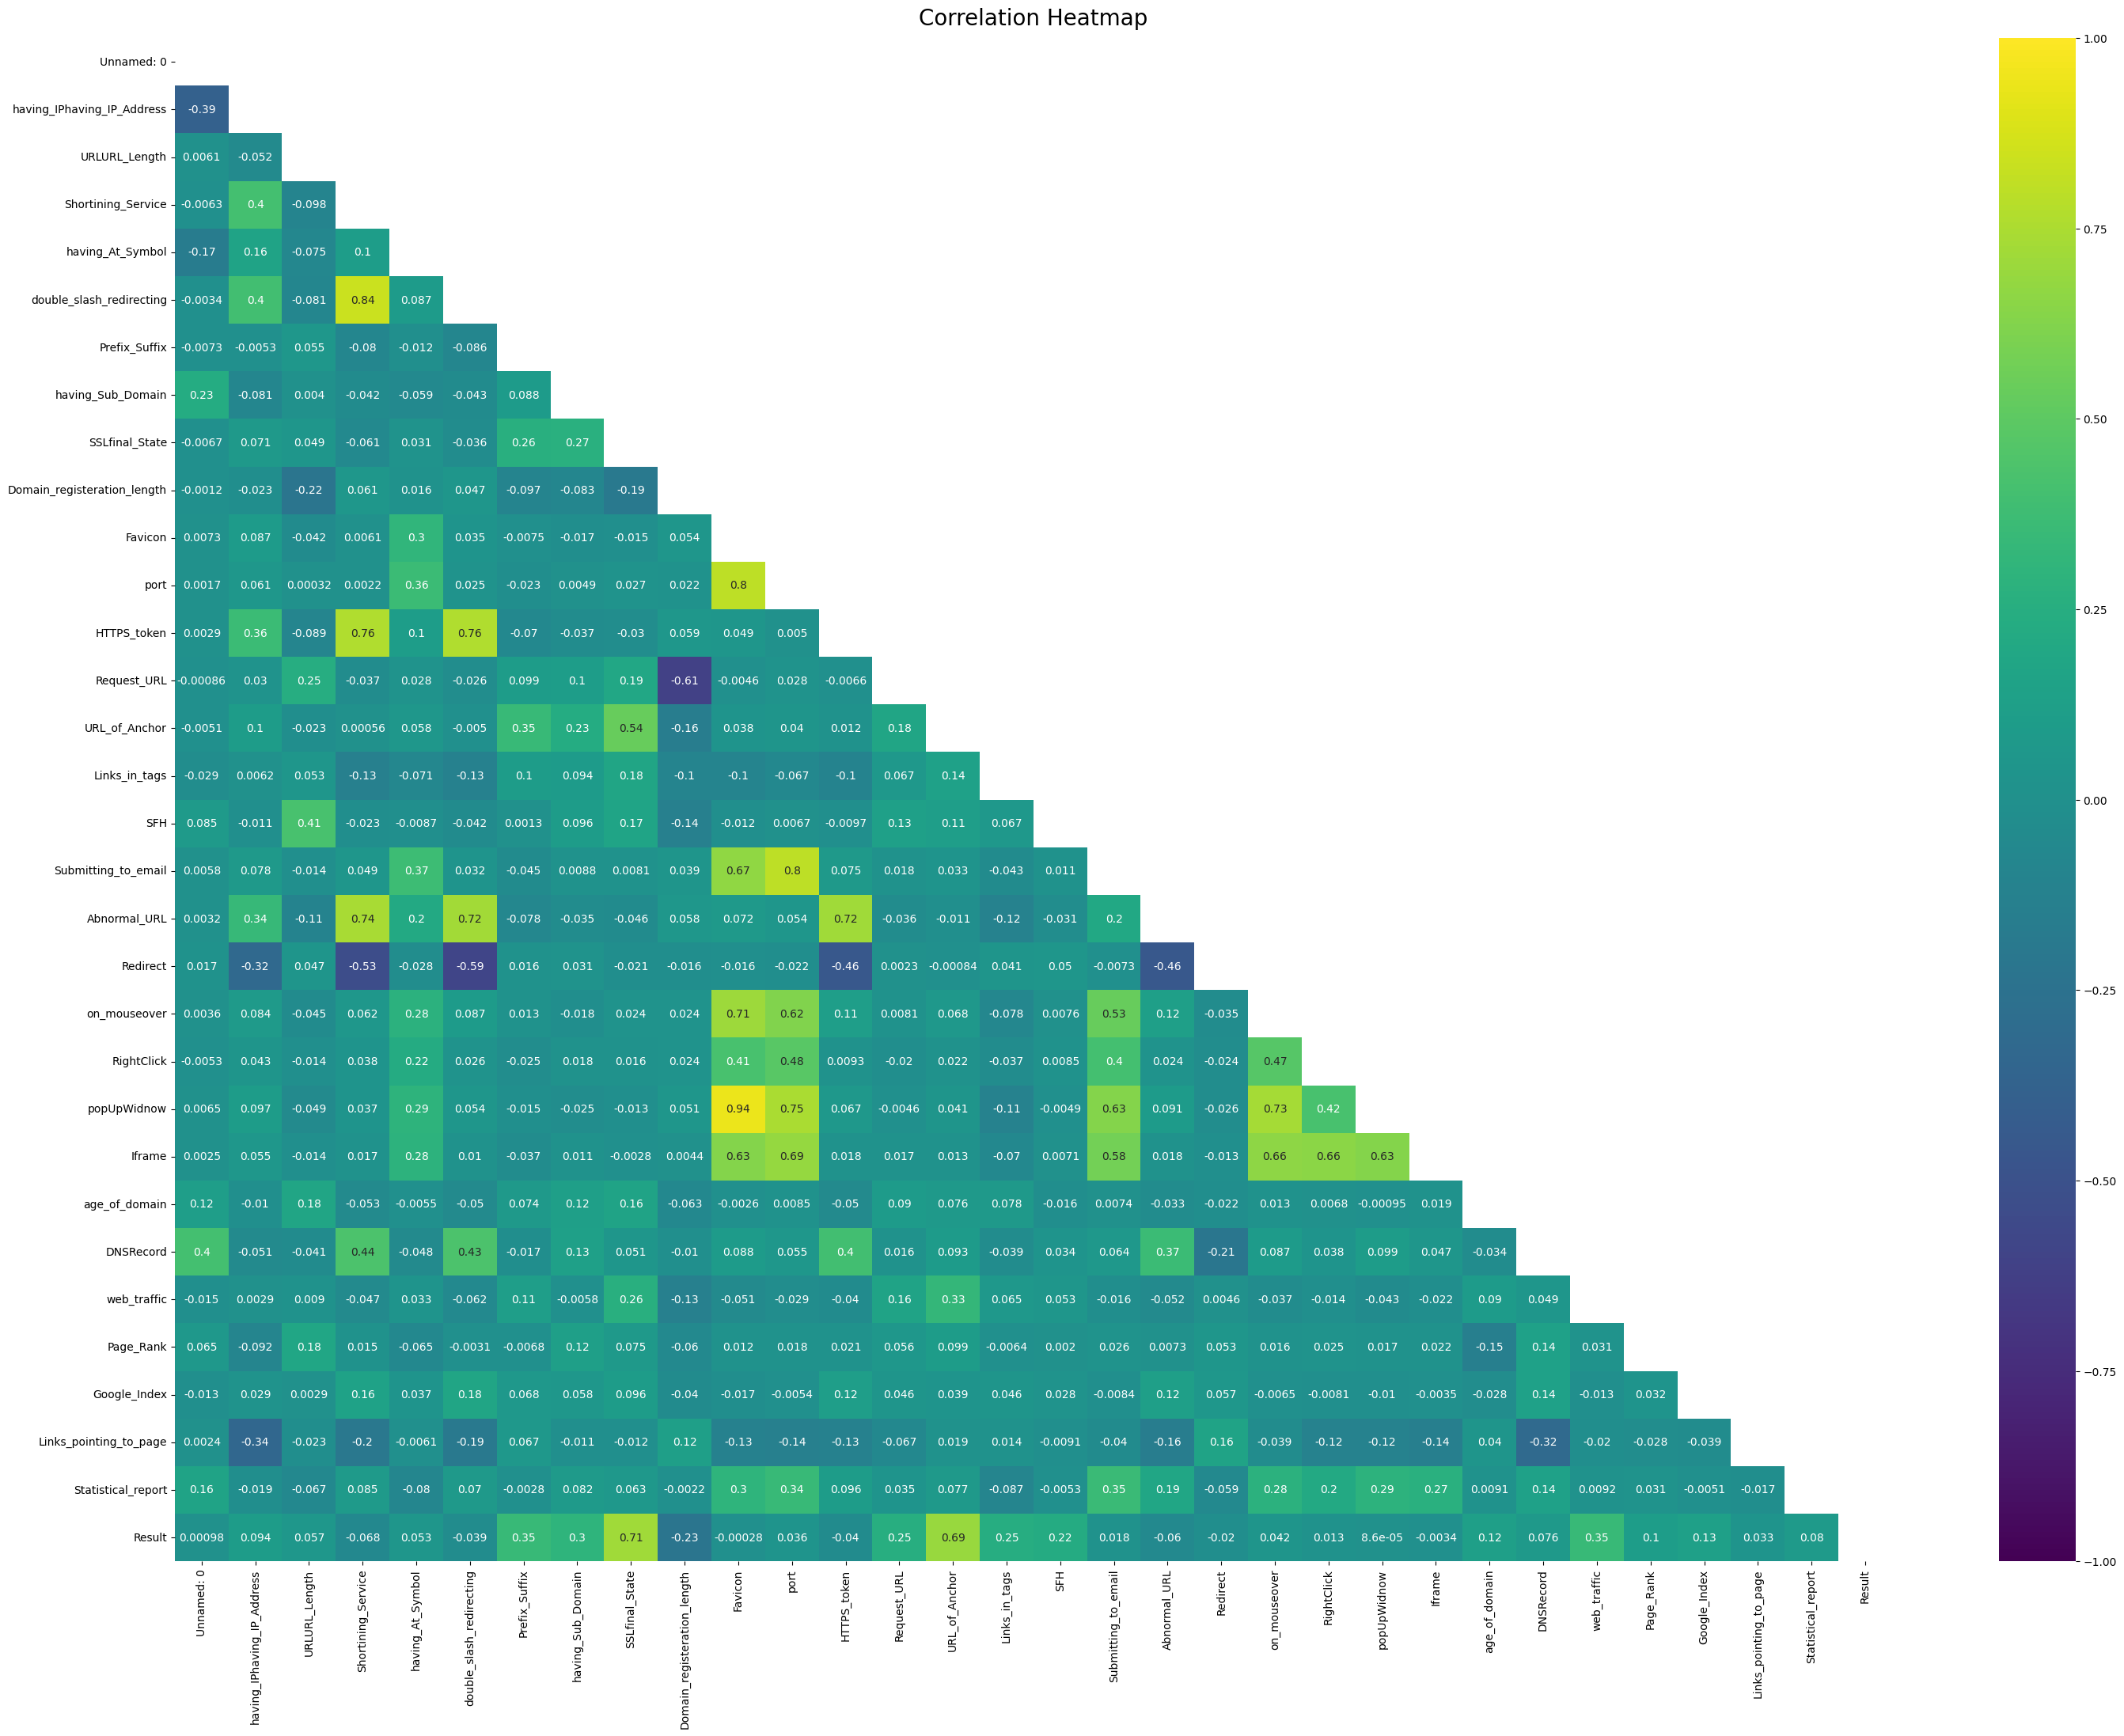

In [ ]:
plt.figure(figsize=(35, 25))
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
heatmap = sns.heatmap(corr, mask = mask, vmin=-1, vmax=1, annot=True, cmap = 'viridis')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':20}, pad=12);
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

`popUpWindow` and `favicon` are highly correlated. Looking at the definitions of these features from the Data description, we can say that, for websites where favicon is loaded from external links the pop-up window mostly contains text field. This is said just by seeing the high correlation. Dropping one of the features or not is an experimental decision.

some features are negatively correlated but the color index minimum correlation is upto -0.6. Negative correlations are where one feature marks it as phishing and other don't.

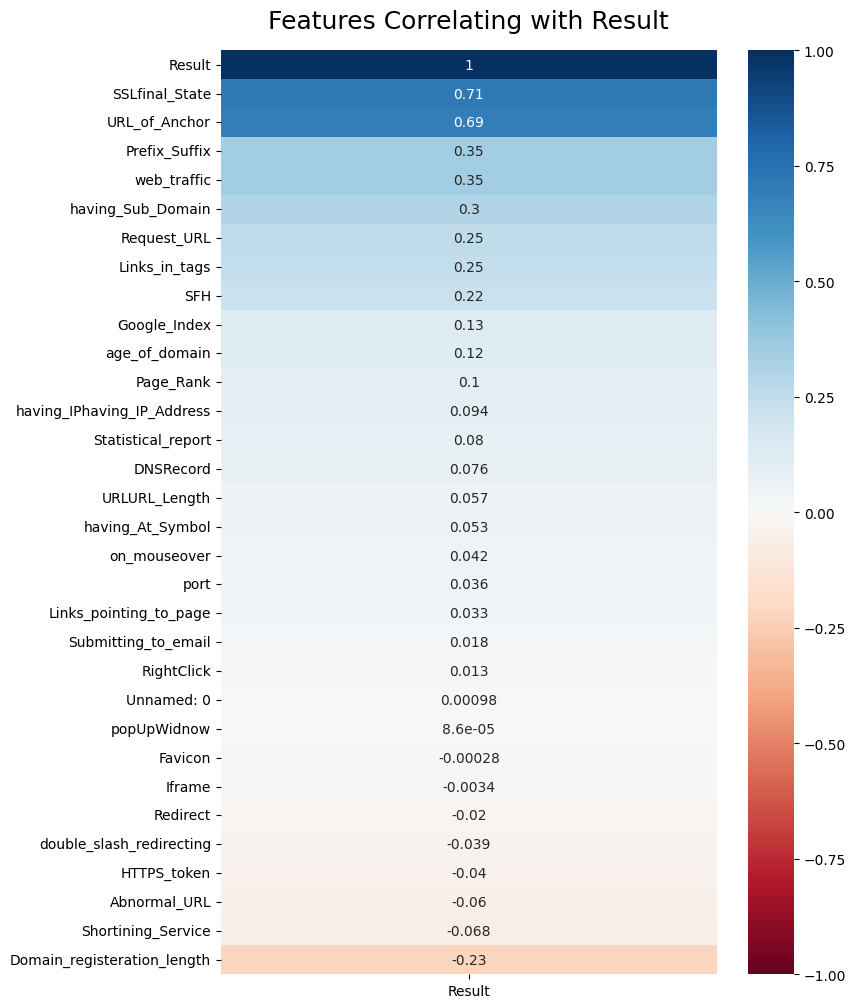

In [ ]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df.corr()[['Result']].sort_values(by='Result', ascending=False), vmin=-1, vmax=1, annot=True, cmap = 'RdBu')
heatmap.set_title('Features Correlating with Result', fontdict={'fontsize':18}, pad=16);
plt.savefig('heatmapfeaturecorr.png', dpi=300, bbox_inches='tight')

## XGBOOST MODEL

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from xgboost import XGBClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding, Conv1D, GlobalMaxPooling1D
from keras.utils import to_categorical


In [ ]:
def binary_classification_accuracy(actual, pred):

    print(f'Confusion matrix: \n{confusion_matrix(actual, pred)}')
    print(f'Accuracy score: \n{accuracy_score(actual, pred)}')
    print(f'Classification report: \n{classification_report(actual, pred)}')

In [ ]:
# Replacing -1 with 0 in the target variable
import numpy as np
df['Result'] = np.where(df['Result']==-1, 0, df['Result'])
target = df['Result']
features = df.drop(columns=['Result'])

In [ ]:
folds = KFold(n_splits=4, shuffle=True, random_state=42)

train_index_list = list()
validation_index_list = list()

for fold, (train_idx, validation_idx) in enumerate(folds.split(features, target)):

    model = XGBClassifier()
    model.fit(np.array(features)[train_idx,:], np.array(target)[train_idx])
    predicted_values = model.predict(np.array(features)[validation_idx,:])
    print(f'==== FOLD {fold+1} ====')
    binary_classification_accuracy(np.array(target)[validation_idx], predicted_values)

==== FOLD 1 ====
Confusion matrix: 
[[1128   55]
 [  36 1545]]
Accuracy score: 
0.9670767004341534
Classification report: 
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1183
           1       0.97      0.98      0.97      1581

    accuracy                           0.97      2764
   macro avg       0.97      0.97      0.97      2764
weighted avg       0.97      0.97      0.97      2764

==== FOLD 2 ====
Confusion matrix: 
[[1156   60]
 [  43 1505]]
Accuracy score: 
0.9627351664254703
Classification report: 
              precision    recall  f1-score   support

           0       0.96      0.95      0.96      1216
           1       0.96      0.97      0.97      1548

    accuracy                           0.96      2764
   macro avg       0.96      0.96      0.96      2764
weighted avg       0.96      0.96      0.96      2764

==== FOLD 3 ====
Confusion matrix: 
[[1201   51]
 [  43 1469]]
Accuracy score: 
0.9659913169319826
C

## LSTM MODEL AND CNN MODEL

In [ ]:
import numpy as np
from sklearn.model_selection import KFold
from keras.models import Sequential
from keras.layers import LSTM, Dense, Conv1D, GlobalMaxPooling1D
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import MinMaxScaler

# Data Preparation
features = df.drop(columns=['Result']).values  # Numeric features
target = df['Result'].values

# Normalize features for better neural network performance
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

# Reshape target for categorical crossentropy (if using softmax in the last layer)
target_categorical = to_categorical(target)

# Define the model setup function for LSTM
def create_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(50, input_shape=input_shape))
    model.add(Dense(2, activation='softmax'))  # Using 2 for binary classification in one-hot format
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Define the model setup function for CNN
def create_cnn_model(input_shape):
    model = Sequential()
    model.add(Conv1D(32, 3, activation='relu', input_shape=input_shape))
    model.add(GlobalMaxPooling1D())
    model.add(Dense(2, activation='softmax'))  # Using 2 for binary classification in one-hot format
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# KFold Cross-Validation
n_splits = 4
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
fold = 1

for train_index, test_index in kf.split(features_scaled):
    X_train, X_test = features_scaled[train_index], features_scaled[test_index]
    y_train, y_test = target_categorical[train_index], target_categorical[test_index]

    # LSTM Model
    lstm_input_shape = (1, X_train.shape[1])  # LSTM expects 3D input (batch, timesteps, features)
    X_train_lstm = np.reshape(X_train, (-1, 1, X_train.shape[1]))
    X_test_lstm = np.reshape(X_test, (-1, 1, X_test.shape[1]))
    lstm_model = create_lstm_model(lstm_input_shape)
    lstm_model.fit(X_train_lstm, y_train, epochs=10, batch_size=64)
    lstm_predictions = lstm_model.predict(X_test_lstm)
    lstm_predictions = np.argmax(lstm_predictions, axis=1)
    y_test_argmax = np.argmax(y_test, axis=1)

    print(f'==== FOLD {fold} LSTM Results ====')
    print('Confusion Matrix:\n', confusion_matrix(y_test_argmax, lstm_predictions))
    print('Accuracy Score:', accuracy_score(y_test_argmax, lstm_predictions))
    print('Classification Report:\n', classification_report(y_test_argmax, lstm_predictions))

    # CNN Model
    cnn_input_shape = (X_train.shape[1], 1)  # CNN expects 3D input (batch, features, channels)
    X_train_cnn = np.reshape(X_train, (-1, X_train.shape[1], 1))
    X_test_cnn = np.reshape(X_test, (-1, X_test.shape[1], 1))
    cnn_model = create_cnn_model(cnn_input_shape)
    cnn_model.fit(X_train_cnn, y_train, epochs=10, batch_size=64)
    cnn_predictions = cnn_model.predict(X_test_cnn)
    cnn_predictions = np.argmax(cnn_predictions, axis=1)

    print(f'==== FOLD {fold} CNN Results ====')
    print('Confusion Matrix:\n', confusion_matrix(y_test_argmax, cnn_predictions))
    print('Accuracy Score:', accuracy_score(y_test_argmax, cnn_predictions))
    print('Classification Report:\n', classification_report(y_test_argmax, cnn_predictions))

    fold += 1


Epoch 1/10
130/130 [==============================] - 4s 3ms/step - loss: 0.4853 - accuracy: 0.7900
Epoch 2/10
130/130 [==============================] - 0s 3ms/step - loss: 0.2410 - accuracy: 0.9105
Epoch 3/10
130/130 [==============================] - 0s 3ms/step - loss: 0.2113 - accuracy: 0.9193
Epoch 4/10
130/130 [==============================] - 0s 3ms/step - loss: 0.1976 - accuracy: 0.9226
Epoch 5/10
130/130 [==============================] - 1s 5ms/step - loss: 0.1911 - accuracy: 0.9250
Epoch 6/10
130/130 [==============================] - 1s 5ms/step - loss: 0.1871 - accuracy: 0.9268
Epoch 7/10
130/130 [==============================] - 1s 5ms/step - loss: 0.1844 - accuracy: 0.9279
Epoch 8/10
130/130 [==============================] - 1s 5ms/step - loss: 0.1796 - accuracy: 0.9299
Epoch 9/10
130/130 [==============================] - 1s 5ms/step - loss: 0.1775 - accuracy: 0.9306
Epoch 10/10
87/87 [==============================] - 1s 2ms/step
==== FOLD 1 LSTM Results ====
Confu

## Hybrid LSTM-CNN MODEL

In [ ]:
from keras.models import Model
from keras.layers import Input, LSTM, Conv1D, GlobalMaxPooling1D, Dense, concatenate
from keras.utils import to_categorical
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold

# Normalize features
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

# Reshape target for categorical crossentropy
target_categorical = to_categorical(target)

# Define the hybrid model setup function
def create_hybrid_lstm_cnn_model(input_shape):
    # Input layer
    input_layer = Input(shape=input_shape)

    # LSTM branch
    lstm_branch = LSTM(50, return_sequences=True)(input_layer)
    lstm_branch = GlobalMaxPooling1D()(lstm_branch)

    # CNN branch
    cnn_branch = Conv1D(32, kernel_size=1, activation='relu')(input_layer)
    cnn_branch = GlobalMaxPooling1D()(cnn_branch)

    # Concatenate both branches
    concatenated = concatenate([lstm_branch, cnn_branch])

    # Fully connected layer
    output = Dense(2, activation='softmax')(concatenated)

    # Create model
    model = Model(inputs=input_layer, outputs=output)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model

# KFold Cross-Validation
n_splits = 4
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
fold = 1

for train_index, test_index in kf.split(features_scaled):
    X_train, X_test = features_scaled[train_index], features_scaled[test_index]
    y_train, y_test = target_categorical[train_index], target_categorical[test_index]

    # Reshape for LSTM and CNN
    X_train_reshaped = np.reshape(X_train, (-1, 1, 31))  # Reshape to (samples, 1 timestep, 31 features)
    X_test_reshaped = np.reshape(X_test, (-1, 1, 31))

    # Create and train hybrid model
    hybrid_model = create_hybrid_lstm_cnn_model((1, 31))
    hybrid_model.fit(X_train_reshaped, y_train, epochs=10, batch_size=64)

    # Predict and evaluate
    predictions = hybrid_model.predict(X_test_reshaped)
    predictions = np.argmax(predictions, axis=1)
    y_test_argmax = np.argmax(y_test, axis=1)

    print(f'==== FOLD {fold} Hybrid LSTM-CNN Results ====')
    print('Confusion Matrix:\n', confusion_matrix(y_test_argmax, predictions))
    print('Accuracy Score:', accuracy_score(y_test_argmax, predictions))
    print('Classification Report:\n', classification_report(y_test_argmax, predictions))

    fold += 1


Epoch 1/10
130/130 [==============================] - 5s 12ms/step - loss: 0.4394 - accuracy: 0.8176
Epoch 2/10
130/130 [==============================] - 1s 7ms/step - loss: 0.2289 - accuracy: 0.9156
Epoch 3/10
130/130 [==============================] - 1s 6ms/step - loss: 0.1988 - accuracy: 0.9247
Epoch 4/10
130/130 [==============================] - 1s 5ms/step - loss: 0.1875 - accuracy: 0.9263
Epoch 5/10
130/130 [==============================] - 0s 3ms/step - loss: 0.1809 - accuracy: 0.9294
Epoch 6/10
130/130 [==============================] - 0s 4ms/step - loss: 0.1759 - accuracy: 0.9313
Epoch 7/10
130/130 [==============================] - 1s 5ms/step - loss: 0.1724 - accuracy: 0.9323
Epoch 8/10
130/130 [==============================] - 1s 5ms/step - loss: 0.1694 - accuracy: 0.9345
Epoch 9/10
130/130 [==============================] - 1s 6ms/step - loss: 0.1667 - accuracy: 0.9361
Epoch 10/10
87/87 [==============================] - 1s 2ms/step
==== FOLD 1 Hybrid LSTM-CNN Result